In [1]:
# Configurar el entorno e instalar dependencias
import os
import subprocess

# Instalar dependencias para ADV-O
#subprocess.run(['pip', 'install', '-r', 'ADV-O/requirements.txt'])

# Instalar dependencias para SparkovDataGeneration
#subprocess.run(['pip', 'install', '-r', 'SparkovDataGeneration/requirements.txt'])

In [3]:
# Ejecutar el simulador ADV-O
os.chdir('ADV_O')
subprocess.run(['python', 'main_synthetic.py'])
os.chdir('..')  

In [3]:
# Ejecutar el simulador de Fraud Detection Handbook
os.chdir('Fraud_Detection_Handbook')
subprocess.run(['python', 'SimulatedDataset.py'])
os.chdir('..')

In [4]:
# Ejecutar el simulador SparkovDataGeneration
os.chdir('SparkovDataGeneration')
subprocess.run(['python', 'datagen.py'])
os.chdir('..') 

In [94]:
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Rutas de las carpetas de salida
output_dirs = [
    'Output/SparkovDataGeneration',
    'Output/ADV-O',
    'Output/Fraud Detection Handbook'
]

# Consolidar archivos CSV de SparkovDataGeneration
df_sparkov = pd.DataFrame()
df_ADVO = pd.DataFrame()
df_Handbook = pd.DataFrame()

# Iterar sobre cada carpeta de salida
for output_dir in output_dirs:
    print(f"Leyendo archivos en la carpeta: {output_dir}")
    if os.path.exists(output_dir):
        archivos = os.listdir(output_dir)
        print("Archivos en la carpeta:", archivos)

        # Leer archivos CSV si existen
        for archivo in archivos:
            if archivo.endswith('.csv') and archivo != 'customers.csv' and archivo != 'consolidado_sparkov.csv' and archivo != 'terminal_profiles.csv'and archivo != 'customer_profile.csv' and archivo != 'consolidado_Handbook.csv':
                ruta_archivo = os.path.join(output_dir, archivo)

                if output_dir.endswith('SparkovDataGeneration'):
                   # print("Encontro directorio SparkovDataGeneration")
                    # Leer CSV delimitado por |
                    df = pd.read_csv(ruta_archivo, delimiter='|')
                    df_sparkov = pd.concat([df_sparkov, df], ignore_index=True)
                elif output_dir.endswith('ADV-O'):
                    print("Encontro directorio ADV-O")
                    # Leer CSV estándar y consolidar en df_ADVO
                    df = pd.read_csv(ruta_archivo)
                    df_ADVO = pd.concat([df_ADVO, df], ignore_index=True)
                elif output_dir.endswith('Fraud Detection Handbook'):
                    print("Encontro directorio Fraud Detection Handbook")
                    # Leer CSV estándar y consolidar en df_Handbook
                    df = pd.read_csv(ruta_archivo)
                    df_Handbook = pd.concat([df_Handbook, df], ignore_index=True)
    else:
        print(f"La carpeta {output_dir} no existe.")

# Mostrar y guardar los DataFrames consolidados
if not df_sparkov.empty:
    print("DataFrame consolidado de SparkovDataGeneration:")
    print(df_sparkov.head())
    df_sparkov['DATE_TIME'] = df_sparkov['trans_date'].astype(str) + ' ' + df_sparkov['trans_time'].astype(str)
    df_sparkov.to_csv('Output/SparkovDataGeneration/consolidado_sparkov.csv', index=False)
    print("Archivo consolidado guardado en Output/SparkovDataGeneration/consolidado_sparkov.csv")

if not df_ADVO.empty:
    print("DataFrame consolidado de ADV-O:")
    print(df_ADVO.head())
    if 'TX_FRAUD' in df_ADVO.columns:
        df_ADVO['TX_FRAUD'] = df_ADVO['TX_FRAUD'].astype(int)
        print("Columna TX_FRAUD convertida de True/False a 0/1.")
    else:
        print("La columna TX_FRAUD no existe en el DataFrame.")
    #df_ADVO.to_csv('Output/ADV-O/consolidado_ADVO.csv', index=False)
    print("Archivo consolidado guardado en Output/ADV-O/consolidado_ADVO.csv")

if not df_Handbook.empty:
    print("DataFrame consolidado de Fraud Detection Handbook:")
    print(df_Handbook.head())
    customer_profile_path = 'Output/Fraud Detection Handbook/customer_profile.csv'
    terminal_profiles_path = 'Output/Fraud Detection Handbook/terminal_profiles.csv'

    if os.path.exists(customer_profile_path) and os.path.exists(terminal_profiles_path):
        # Leer customer_profile y terminal_profiles
        df_customer_profile = pd.read_csv(customer_profile_path)
        df_terminal_profiles = pd.read_csv(terminal_profiles_path)
        print("Archivos customer_profile y terminal_profiles leídos con éxito.")
        # Merge con customer_profile usando CUSTOMER_ID
        df_Handbook = df_Handbook.merge(df_customer_profile, on='CUSTOMER_ID', how='left')
        print("Merge con customer_profile realizado.")
        # Merge con terminal_profiles usando TERMINAL_ID
        df_Handbook = df_Handbook.merge(df_terminal_profiles, on='TERMINAL_ID', how='left')
        print("Merge con terminal_profiles realizado.")
        
        # Guardar el DataFrame consolidado
        df_Handbook.to_csv('Output/Fraud Detection Handbook/consolidado_Handbook.csv', index=False)
        print("Archivo consolidado guardado en Output/Fraud Detection Handbook/consolidado_Handbook.csv")
    else:
        print("Uno o más archivos necesarios para el merge no existen.")

Leyendo archivos en la carpeta: Output/SparkovDataGeneration
Archivos en la carpeta: ['adults_2550_female_rural_000-099.csv', 'adults_2550_female_rural_100-199.csv', 'adults_2550_female_rural_200-299.csv', 'adults_2550_female_rural_300-399.csv', 'adults_2550_female_rural_400-499.csv', 'adults_2550_female_urban_000-099.csv', 'adults_2550_female_urban_100-199.csv', 'adults_2550_female_urban_200-299.csv', 'adults_2550_female_urban_300-399.csv', 'adults_2550_female_urban_400-499.csv', 'adults_2550_male_rural_000-099.csv', 'adults_2550_male_rural_100-199.csv', 'adults_2550_male_rural_200-299.csv', 'adults_2550_male_rural_300-399.csv', 'adults_2550_male_rural_400-499.csv', 'adults_2550_male_urban_000-099.csv', 'adults_2550_male_urban_100-199.csv', 'adults_2550_male_urban_200-299.csv', 'adults_2550_male_urban_300-399.csv', 'adults_2550_male_urban_400-499.csv', 'adults_50up_female_rural_000-099.csv', 'adults_50up_female_rural_100-199.csv', 'adults_50up_female_rural_200-299.csv', 'adults_50up_f

In [12]:
import pandas as pd
#Lectura de los datos del archivo csv
df_real_transaccion_credit = pd.read_csv('../Data/Real/credit_dataset_2_transaccion_credit.csv')

print("DataFrame real transaccion:")
print(df_real_transaccion_credit.head())

DataFrame real transaccion:
   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400          68.500         W  13926   
1        2987001        0          86401          29.000         W   2755   
2        2987004        0          86506          50.000         H   4497   
3        2987010        0          86549          75.887         C  16496   
4        2987017        0          86668         100.000         H  11492   

   card2  card3       card4  card5  ... V332  V333  V334  V335  V336 V337  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   
3  352.0  117.0  mastercard  134.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  111.0  150.0  mastercard  219.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V338  V339  uid_td_D1      uid  
0  NaN   Na

In [88]:
print(df_ADVO.shape)
print(df_sparkov.shape)
print(df_Handbook.shape)
print(df_real_transaccion_credit.shape)

(185044, 9)
(211043, 27)
(171383, 17)
(149016, 396)


In [109]:
# --- Funciones auxiliares ---
import pandas as pd
import hashlib
import numpy as np

def rescale_coordinates(df, x_col='x_customer_id', y_col='y_customer_id'):
    """Reescala las coordenadas X,Y de un simulador al rango [0,100]."""
    df = df.copy()
    df[x_col] = df[x_col].fillna(df[x_col].median())
    df[y_col] = df[y_col].fillna(df[y_col].median())

    df['X'] = 100 * (df[x_col] - df[x_col].min()) / (df[x_col].max() - df[x_col].min())
    df['Y'] = 100 * (df[y_col] - df[y_col].min()) / (df[y_col].max() - df[y_col].min())
    return df


def convert_dates_simulators(df, date_col='trans_date'):
    """
    Convierte la fecha de los simuladores (en formato string)
    a columnas HOUR, DAY, MONTH manejando distintos formatos.
    """
    df = df.copy()

    # Posibles formatos por simulador
    possible_formats = [
        "%Y-%m-%d %H:%M:%S",       # Ej: 2025-02-23 23:16:54 (Sparkov)
        "%d/%m/%Y %I:%M:%S %p",    # Ej: 01/01/2025 12:07:56 a. m. (Handbook)
        "%Y-%m-%d %H:%M:%S"        # Ej: 2025-01-01 08:38:40 (Advo)
    ]

    # Intentar convertir en orden
    for fmt in possible_formats:
        try:
            df['DATE_TS'] = pd.to_datetime(df[date_col], format=fmt)
            break
        except Exception:
            continue

    # Extraer partes
    df['HOUR'] = df['DATE_TS'].dt.hour
    df['DAY'] = df['DATE_TS'].dt.day
    df['MONTH'] = df['DATE_TS'].dt.month

    return df

def generate_coordinates_by_zones(df, addr1_col='addr1', addr2_col='addr2',
                                  grid_size=100, country_bounds=(10,90), random_state=42):
    """
    Distribuye addr1 dentro del cuadrado del país principal (addr2 más frecuente)
    en toda el área del cuadrado, asignando zonas proporcionales a su frecuencia
    y dispersión natural (sin concentrarse en una esquina).
    """
    rng = np.random.default_rng(random_state)
    df = df.copy()

    # Rellenar nulos
    df[addr1_col] = df[addr1_col].fillna(df[addr1_col].median())
    df[addr2_col] = df[addr2_col].fillna(df[addr2_col].median())

    # País principal
    main_country = df[addr2_col].value_counts().idxmax()
    df_main = df[df[addr2_col] == main_country].copy()
    df_other = df[df[addr2_col] != main_country].copy()

    # Frecuencias por región
    addr1_counts = df_main[addr1_col].value_counts(normalize=True)
    addr1_values = addr1_counts.index.tolist()

    # Cuadrado principal (el país)
    x_min, x_max = country_bounds
    y_min, y_max = country_bounds
    width = x_max - x_min
    height = y_max - y_min

    # Crear centros de regiones aleatorios dentro del cuadrado
    n_zones = len(addr1_values)
    centers = rng.uniform([x_min, y_min], [x_max, y_max], (n_zones, 2))
    zone_positions = dict(zip(addr1_values, centers))

    # Generar puntos con densidad proporcional a la frecuencia
    X_main, Y_main = np.zeros(len(df_main)), np.zeros(len(df_main))
    max_spread = (width / 6)  # tamaño máximo de dispersión

    for addr1, center in zone_positions.items():
        mask = df_main[addr1_col] == addr1
        n_points = mask.sum()

        # Dispersión proporcional (más frecuente = más área)
        freq = addr1_counts[addr1]
        spread = max_spread * np.sqrt(freq)

        X_main[mask] = rng.normal(center[0], spread, n_points)
        Y_main[mask] = rng.normal(center[1], spread, n_points)

    # Mantener dentro de la grilla del país
    X_main = np.clip(X_main, x_min, x_max)
    Y_main = np.clip(Y_main, y_min, y_max)

    df_main['X'] = X_main
    df_main['Y'] = Y_main

    # --- Países secundarios (fuera del cuadrado central) ---
    if not df_other.empty:
        n_other = len(df_other)
        X_other = rng.uniform(0, grid_size, n_other)
        Y_other = rng.uniform(0, grid_size, n_other)
        df_other['X'] = X_other
        df_other['Y'] = Y_other

    # Combinar
    df_out = pd.concat([df_main, df_other], ignore_index=True)
    df_out['X'] = np.clip(df_out['X'], 0, grid_size)
    df_out['Y'] = np.clip(df_out['Y'], 0, grid_size)

    return df_out

def convert_transactiondt_to_dateparts(df, transdt_col='TransactionDT', start_date='2025-01-01'):
    """Convierte TransactionDT (segundos) en columnas HOUR, DAY, MONTH usando como inicio 01/01/2025."""
    df = df.copy()

    # Fecha base
    base_datetime = pd.to_datetime(start_date).normalize()

    # Crear columna de fecha completa
    df['DATE_TS'] = base_datetime + pd.to_timedelta(df[transdt_col], unit='s')

    # Extraer componentes
    df['HOUR'] = df['DATE_TS'].dt.hour
    df['DAY'] = df['DATE_TS'].dt.day
    df['MONTH'] = df['DATE_TS'].dt.month

    return df

def normalize_user_ids(df, user_col='uid', dataset_name='real'):
    """
    Normaliza los IDs de usuario para que sean enteros consecutivos
    distintos entre datasets (sin importar si los originales son numéricos).
    """
    df = df.copy()
  #  print(df[user_col])
    # Forzar que se traten como strings (importante si los originales son números grandes)
    df[user_col] = df[user_col].astype(str)
    
    # Crear mapa de usuarios únicos consecutivos
    unique_users = df[user_col].unique()
    user_map = {u: i for i, u in enumerate(unique_users, start=1)}
    df['USER_ID'] = df[user_col].map(user_map)
    
    
    # Aplicar offset por dataset (mantiene rangos separados)
    offsets = {'real': 1000, 'sim1': 55000, 'sim2': 56000, 'sim3': 57000}
    df['USER_ID'] = df['USER_ID'] + offsets.get(dataset_name, 0)
    #print(df['USER_ID'])
    return df


def add_basic_user_features(df, user_col='USER_ID', amount_col='AMOUNT', hour_col='HOUR'):
    """
    Agrega 4 características básicas por usuario:
      - user_mean_amount
      - user_std_amount
      - user_txn_count
      - user_hour_var
    """
    df = df.copy()

    # Asegurar orden cronológico
    df = df.sort_values([user_col, 'MONTH', 'DAY', 'HOUR'])

    #  Promedio y desviación del monto
    user_amt = df.groupby(user_col)[amount_col].agg(['mean','std']).rename(
        columns={'mean':'user_mean_amount','std':'user_std_amount'})
    df = df.merge(user_amt, on=user_col, how='left')

    # Cantidad total de transacciones
    user_count = df.groupby(user_col).size().rename('user_txn_count')
    df = df.merge(user_count, on=user_col, how='left')

    # Varianza en las horas de compra
    user_hour = df.groupby(user_col)[hour_col].std().rename('user_hour_var')
    df = df.merge(user_hour, on=user_col, how='left')

    # Rellenar valores nulos
    df[['user_std_amount','user_hour_var']] = df[['user_std_amount','user_hour_var']].fillna(0)

    return df


def transform_real_dataset(df, addr1='addr1', addr2='addr2',
                           dist1='dist1', dist2='dist2',
                           user_id='uid', is_fraud='isFraud',
                           amount='TransactionAmt', date='TransactionDT'):
    df = df.copy()
    df = generate_coordinates_by_zones(df, addr1, addr2)
    df = convert_transactiondt_to_dateparts(df, date)
    df = normalize_user_ids(df, user_id, 'real')
    df_final = df[['USER_ID', is_fraud, 'X', 'Y', amount, 'HOUR', 'DAY', 'MONTH']].copy()
    df_final.columns = ['USER_ID', 'IS_FRAUD', 'X', 'Y', 'AMOUNT', 'HOUR', 'DAY', 'MONTH']

    df_final = add_basic_user_features(df_final)
    print(df_final.head())
    return df_final


def transform_simulator_dataset(df, dataset_name='sim1',
                                x_col='x_customer_id', y_col='y_customer_id',
                                user_col='customer_id', is_fraud='is_fraud',
                                amount_col='amt', date_col='trans_date'):
    """
    Transforma un dataset de simulador al formato común:
    USER_ID, IS_FRAUD, X, Y, AMOUNT, HOUR, DAY, MONTH + user features.
    """
    df = df.copy()

    # Reescalar coordenadas
    df = rescale_coordinates(df, x_col, y_col)
    # Convertir fechas a HOUR, DAY, MONTH
    df = convert_dates_simulators(df, date_col)
    # Normalizar IDs de usuario (usa función del real)
    df = normalize_user_ids(df, user_col, dataset_name)
    # Seleccionar columnas base
    df_final = df[['USER_ID', is_fraud, 'X', 'Y', amount_col, 'HOUR', 'DAY', 'MONTH']].copy()
    df_final.columns = ['USER_ID', 'IS_FRAUD', 'X', 'Y', 'AMOUNT', 'HOUR', 'DAY', 'MONTH']
    # Agregar features de usuario
    df_final = add_basic_user_features(df_final)

    return df_final


In [ ]:
print(df_real_transaccion_credit['addr2'].value_counts())

In [ ]:
pd.set_option('display.max_rows', None)
filtro = df_real_transaccion_credit[df_real_transaccion_credit['addr2'] == 87]
    
    # Contar los valores únicos de addr1 en el filtro
valores_unicos = filtro['addr1'].value_counts()

print(valores_unicos)

In [110]:
# 1. Transformar (normalizar estructura y columnas)
df_real_clean = transform_real_dataset(df_real_transaccion_credit, addr1='addr1', addr2='addr2', user_id='uid',
                           is_fraud='isFraud', amount='TransactionAmt', date='TransactionDT')

'''
df_sparkov_clean = transform_simulator_dataset(df_sparkov,dataset_name='sim1',x_col='merch_long', y_col='merch_lat', user_col='merchant',
                                is_fraud='is_fraud', amount_col='amt', date_col='DATE_TIME')
df_ADVO_clean = transform_simulator_dataset(df_ADVO,dataset_name='sim2',x_col='X_TERMINAL', y_col='Y_TERMINAL', user_col='CUSTOMER_ID',
                                is_fraud='TX_FRAUD', amount_col='TX_AMOUNT', date_col='TX_DATETIME')
df_Handbook_clean = transform_simulator_dataset(df_Handbook,dataset_name='sim3',x_col='x_terminal_id', y_col='y_terminal_id', user_col='CUSTOMER_ID',
                                is_fraud='TX_FRAUD', amount_col='TX_AMOUNT', date_col='TX_DATETIME')
'''
df_real_clean.to_csv('./Output_Preprocessed/df_real_preprocessed.csv', index=False)
'''
df_sparkov_clean.to_csv('./Output_Preprocessed/df_sparkov_preprocessed.csv', index=False)
df_ADVO_clean.to_csv('./Output_Preprocessed/df_ADVO_preprocessed.csv', index=False)
df_Handbook_clean.to_csv('./Output_Preprocessed/df_Handbook_preprocessed.csv', index=False)
'''

   USER_ID  IS_FRAUD          X          Y  AMOUNT  HOUR  DAY  MONTH  \
0     1001         0  37.370658  81.349790   68.50     0    2      1   
1     1002         0  80.693194  63.932003   29.00     0    2      1   
2     1002         0  54.070134  32.227528  200.00     4    2      1   
3     1002         0  70.085381  89.358767  125.00    17    2      1   
4     1002         0  44.062510  28.666581  209.95    19    2      1   

   user_mean_amount  user_std_amount  user_txn_count  user_hour_var  
0         68.500000         0.000000               1       0.000000  
1        137.707143        61.647117               7       8.657504  
2        137.707143        61.647117               7       8.657504  
3        137.707143        61.647117               7       8.657504  
4        137.707143        61.647117               7       8.657504  


"\ndf_sparkov_clean.to_csv('./Output_Preprocessed/df_sparkov_preprocessed.csv', index=False)\ndf_ADVO_clean.to_csv('./Output_Preprocessed/df_ADVO_preprocessed.csv', index=False)\ndf_Handbook_clean.to_csv('./Output_Preprocessed/df_Handbook_preprocessed.csv', index=False)\n"

In [111]:
df_real_clean=pd.read_csv('./Output_Preprocessed/df_real_preprocessed.csv')
df_sparkov_clean=pd.read_csv('./Output_Preprocessed/df_sparkov_preprocessed.csv')
df_ADVO_clean=pd.read_csv('./Output_Preprocessed/df_ADVO_preprocessed.csv')
df_Handbook_clean=pd.read_csv('./Output_Preprocessed/df_Handbook_preprocessed.csv')


In [112]:
print(df_real_clean.head())
print(df_sparkov_clean.head())
print(df_ADVO_clean.head())
print(df_Handbook_clean.head())

   USER_ID  IS_FRAUD          X          Y  AMOUNT  HOUR  DAY  MONTH  \
0     1001         0  37.370658  81.349790   68.50     0    2      1   
1     1002         0  80.693194  63.932003   29.00     0    2      1   
2     1002         0  54.070134  32.227528  200.00     4    2      1   
3     1002         0  70.085381  89.358767  125.00    17    2      1   
4     1002         0  44.062510  28.666581  209.95    19    2      1   

   user_mean_amount  user_std_amount  user_txn_count  user_hour_var  
0         68.500000         0.000000               1       0.000000  
1        137.707143        61.647117               7       8.657504  
2        137.707143        61.647117               7       8.657504  
3        137.707143        61.647117               7       8.657504  
4        137.707143        61.647117               7       8.657504  
   USER_ID  IS_FRAUD          X          Y  AMOUNT  HOUR  DAY  MONTH  \
0    55001         0  68.568764  34.667914  216.55     0    1      1   
1  

### COMPARACION DE DATOS GENERADOS CON SIMULADORES CONTRA UN DATASET REAL


In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

def compare_distributions(df_real, df_sim, columns, sim_name="Simulator"):
    """
    Compara distribuciones entre dataset real y simulado usando KDE (densidad).
    """
    for col in columns:
        plt.figure(figsize=(6,4))
        sns.kdeplot(df_real[col], label="Real", fill=True, alpha=0.4)
        sns.kdeplot(df_sim[col], label=sim_name, fill=True, alpha=0.4)
        plt.title(f"Distribución: {col} (Real vs {sim_name})")
        plt.legend()
        plt.show()

In [93]:
def compare_spatial_distribution(df_real, df_sim, sim_name="Simulator"):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.kdeplot(x='X', y='Y', data=df_real, fill=True, cmap='Blues',cbar=False)
    plt.title("Distribución Espacial - Real")

    plt.subplot(1,2,2)
    sns.kdeplot(x='X', y='Y', data=df_sim, fill=True, cmap='Reds',cbar=False)
    plt.title(f"Distribución Espacial - {sim_name}")
    plt.show()

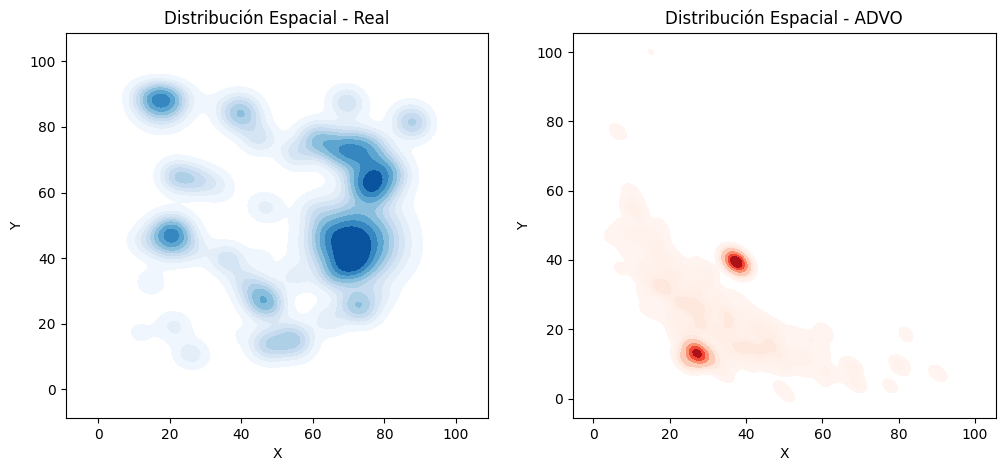

In [97]:
compare_spatial_distribution(df_real_clean, df_ADVO_clean, "ADVO")



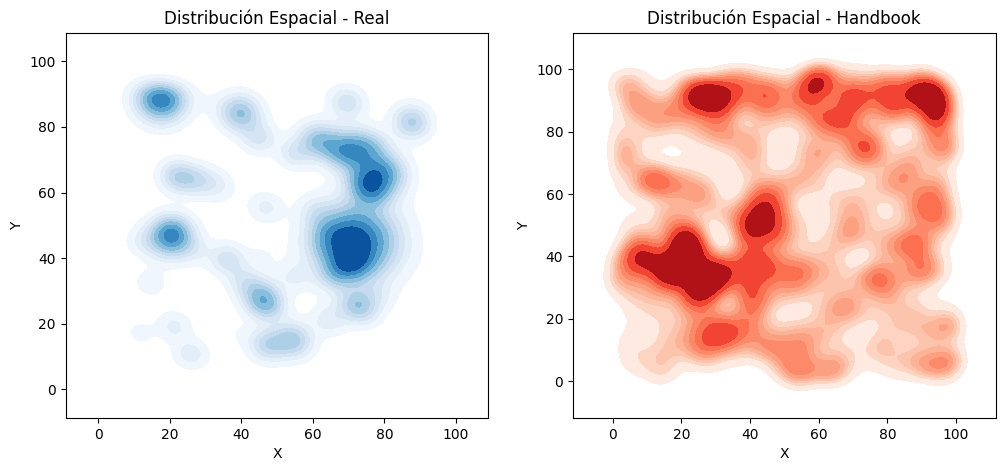

In [95]:
compare_spatial_distribution(df_real_clean, df_Handbook_clean, "Handbook")

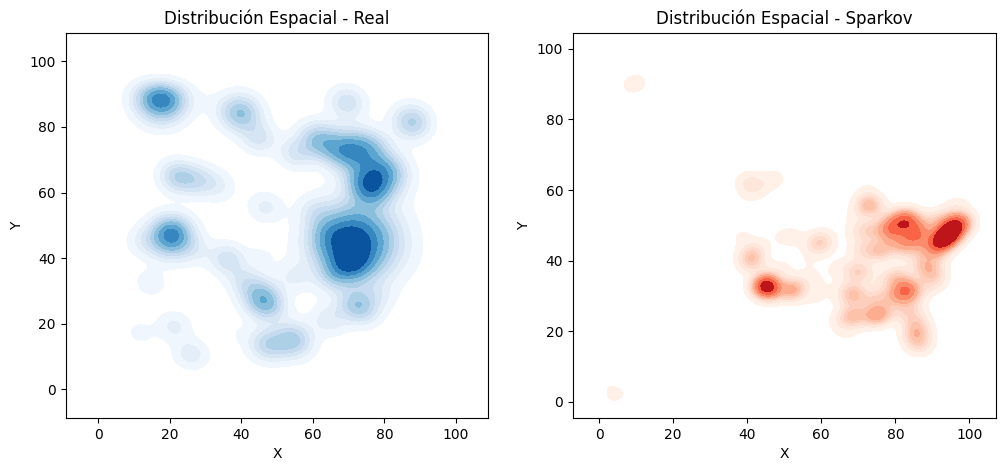

In [98]:
compare_spatial_distribution(df_real_clean, df_sparkov_clean, "Sparkov")

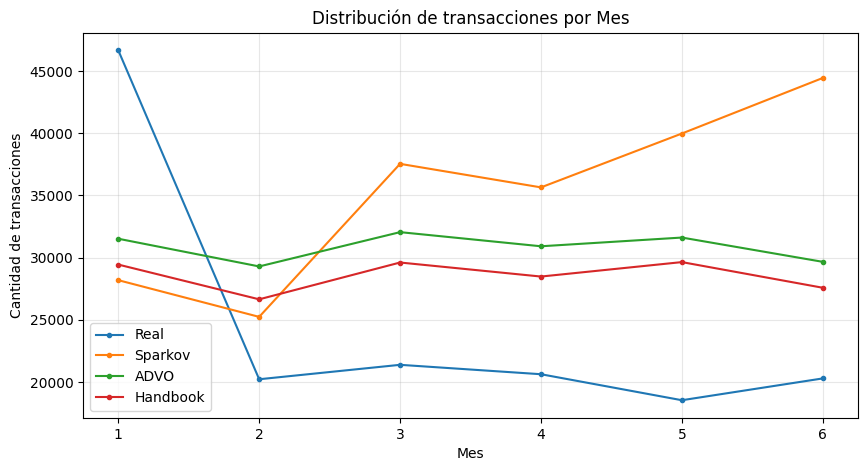

In [118]:
def plot_txn_by_month(datasets, names):
    plt.figure(figsize=(10, 5))
    for df, name in zip(datasets, names):
        # Contar transacciones por mes
        monthly_counts = df.groupby('MONTH').size().reindex(range(1, 7), fill_value=0)
        plt.plot(monthly_counts.index, monthly_counts.values, marker='.', label=name)
    plt.title("Distribución de transacciones por Mes")
    plt.xlabel("Mes")
    plt.ylabel("Cantidad de transacciones")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Uso de la función
datasets = [df_real_clean, df_sparkov_clean, df_ADVO_clean, df_Handbook_clean]
names = ["Real", "Sparkov", "ADVO", "Handbook"]

plot_txn_by_month(datasets, names)

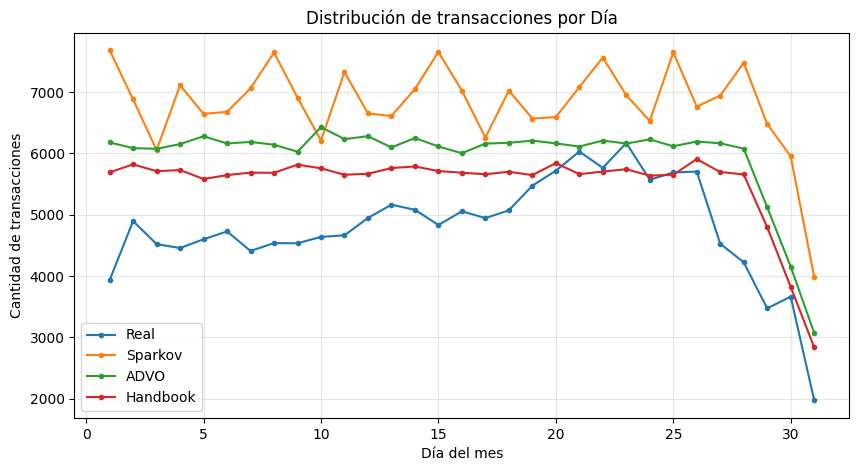

In [115]:
def plot_txn_by_day(datasets, names):
    plt.figure(figsize=(10, 5))
    for df, name in zip(datasets, names):
        # Contar transacciones por día
        daily_counts = df.groupby('DAY').size().reindex(range(1, 32), fill_value=0)
        plt.plot(daily_counts.index, daily_counts.values, marker='.', label=name)
    plt.title("Distribución de transacciones por Día")
    plt.xlabel("Día del mes")
    plt.ylabel("Cantidad de transacciones")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Uso de la función
datasets = [df_real_clean, df_sparkov_clean, df_ADVO_clean, df_Handbook_clean]
names = ["Real", "Sparkov", "ADVO", "Handbook"]

plot_txn_by_day(datasets, names)

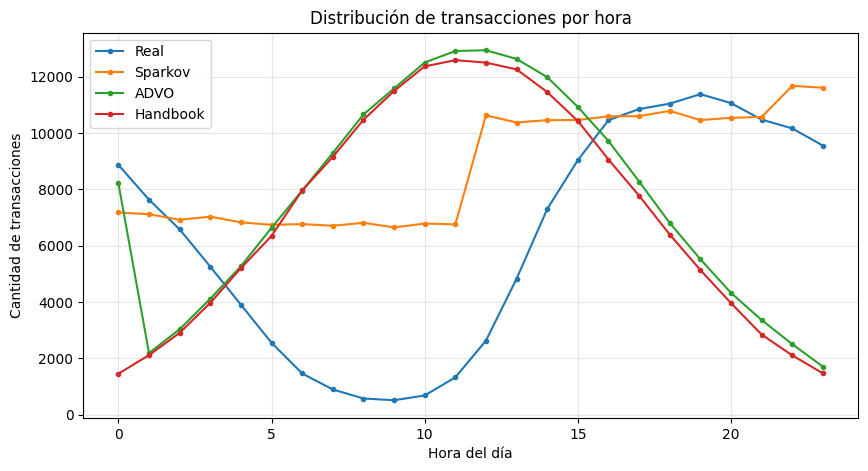

In [113]:

def plot_txn_by_hour(datasets, names):
    plt.figure(figsize=(10,5))
    for df, name in zip(datasets, names):
        hourly_counts = df.groupby('HOUR').size().reindex(range(24), fill_value=0)
        plt.plot(hourly_counts.index, hourly_counts.values, marker='.', label=name)
    plt.title("Distribución de transacciones por hora")
    plt.xlabel("Hora del día")
    plt.ylabel("Cantidad de transacciones")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

datasets = [df_real_clean, df_sparkov_clean, df_ADVO_clean, df_Handbook_clean]
names = ["Real", "Sparkov", "ADVO", "Handbook"]

plot_txn_by_hour(datasets, names)

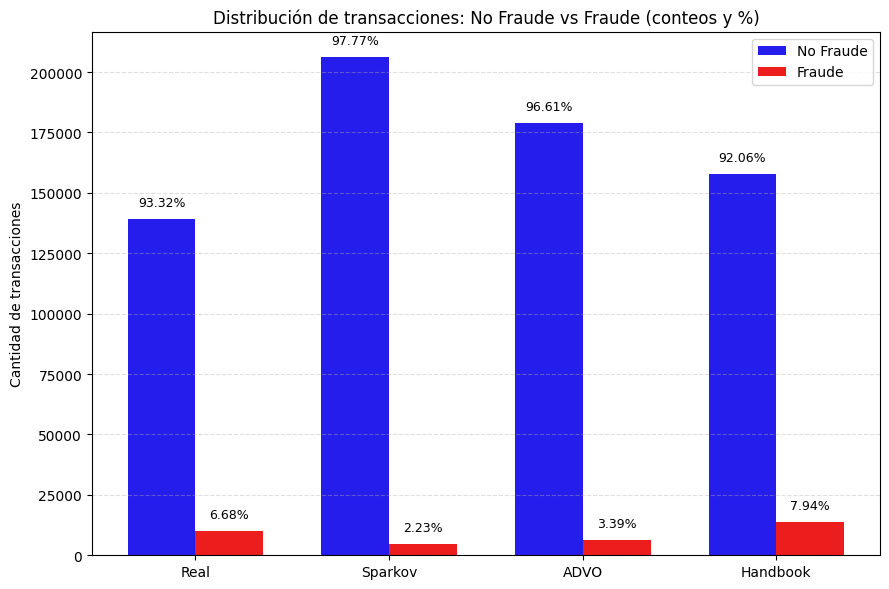

In [ ]:
def plot_fraud_distribution_with_percentages(datasets, names, figsize=(9,6), show_percent_on_bar=True):
    """
    Muestra un gráfico de barras agrupadas (No Fraud / Fraud) por dataset.
    Anota el porcentaje encima de cada barra.
    datasets: lista de DataFrames
    names: lista de nombres (mismo orden)
    """
    # 1) Calcular conteos y porcentajes
    no_counts = []
    fraud_counts = []
    perc_no = []
    perc_fraud = []
    for df in datasets:
        counts = df['IS_FRAUD'].value_counts()
        no = int(counts.get(0, 0))
        fr = int(counts.get(1, 0))
        total = no + fr if (no + fr) > 0 else 1
        no_counts.append(no)
        fraud_counts.append(fr)
        perc_no.append(no / total * 100)
        perc_fraud.append(fr / total * 100)

    # 2) Preparar plot
    x = np.arange(len(names))
    width = 0.35

    fig, ax = plt.subplots(figsize=figsize)

    bars_no = ax.bar(x - width/2, no_counts, width, label='No Fraude', color="#241DEB")
    bars_fr = ax.bar(x + width/2, fraud_counts, width, label='Fraude', color="#EB1D1D")

    # Etiquetas y leyenda
    ax.set_ylabel('Cantidad de transacciones')
    ax.set_title('Distribución de transacciones: No Fraude vs Fraude (conteos y %)')
    ax.set_xticks(x)
    ax.set_xticklabels(names)
    ax.legend()

    # 3) Anotar porcentaje encima de cada barra
    def annotate_bars(bars, perc_list):
        for idx, bar in enumerate(bars):
            h = bar.get_height()
            pct = perc_list[idx]
            # si la barra es muy pequeña, colocar texto encima en posición fija
            y_text = h + max(1.0, 0.02 * max(no_counts + fraud_counts))
            ax.text(bar.get_x() + bar.get_width()/2, y_text,
                    f'{pct:.2f}%', ha='center', va='bottom', fontsize=9, color='black')

    annotate_bars(bars_no, perc_no)
    annotate_bars(bars_fr, perc_fraud)

    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


# --- Uso ---
datasets = [df_real_clean, df_sparkov_clean, df_ADVO_clean, df_Handbook_clean]
names = ["Real", "Sparkov", "ADVO", "Handbook"]
plot_fraud_distribution_with_percentages(datasets, names)

In [148]:
def compare_correlations(df_real, df_sim, sim_name="Simulator"):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.heatmap(df_real.corr(), cmap='coolwarm', center=0, annot=False)
    plt.title("Correlaciones - Dataset Real")

    plt.subplot(1,2,2)
    sns.heatmap(df_sim.corr(), cmap='coolwarm', center=0, annot=False)
    plt.title(f"Correlaciones - {sim_name}")
    plt.show()


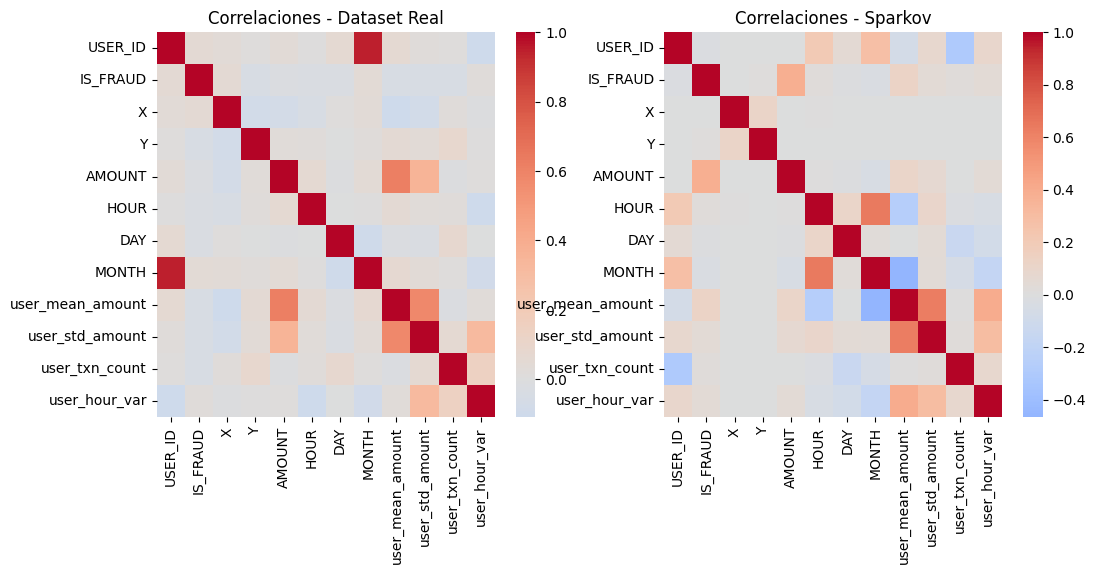

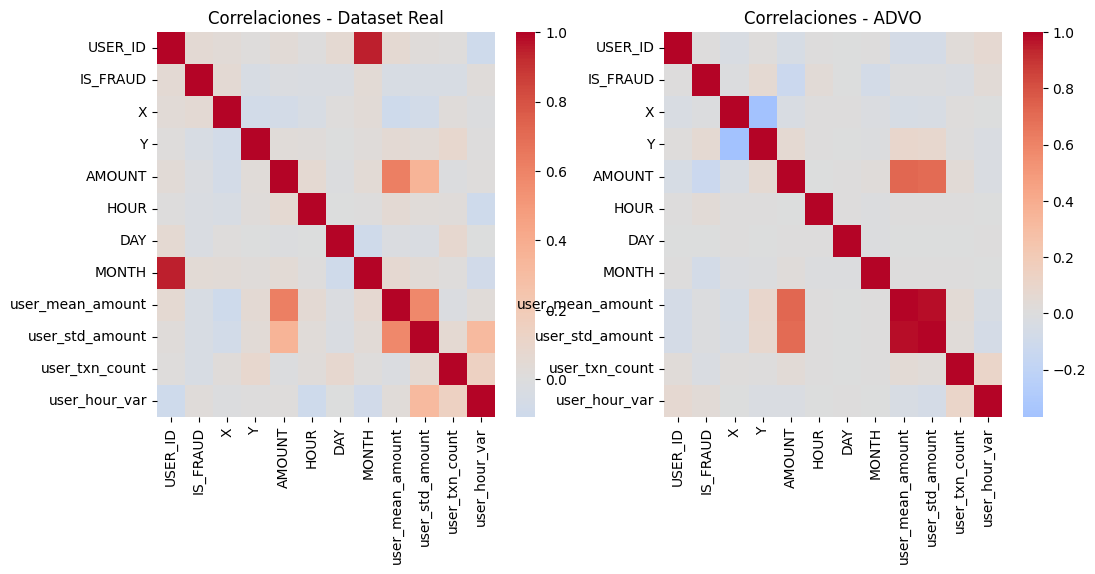

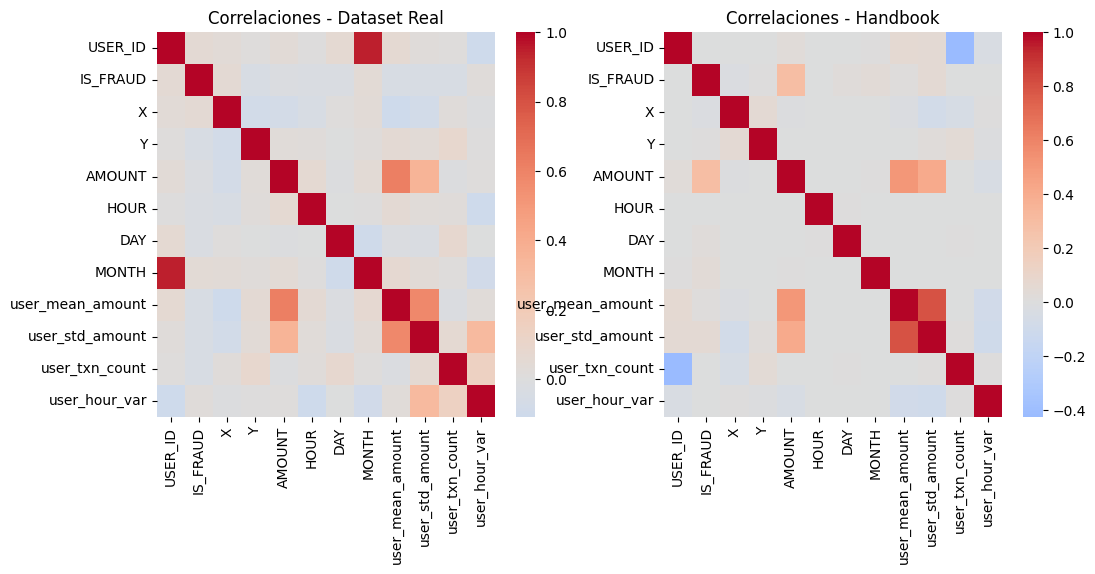

In [119]:
compare_correlations(df_real_clean, df_sparkov_clean, "Sparkov")
compare_correlations(df_real_clean, df_ADVO_clean, "ADVO")
compare_correlations(df_real_clean, df_Handbook_clean, "Handbook")

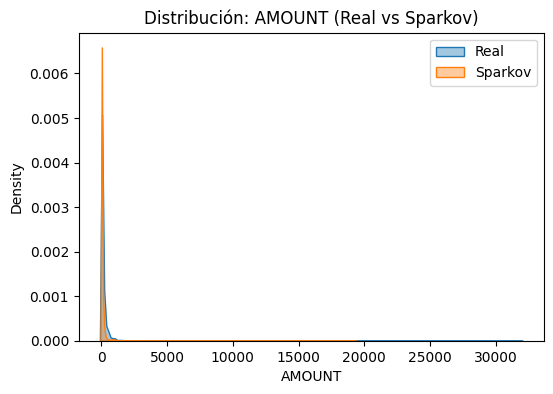

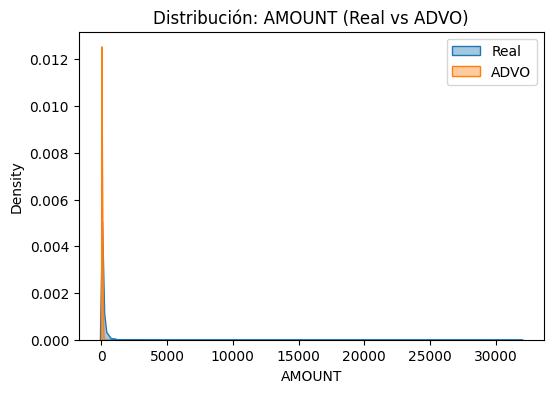

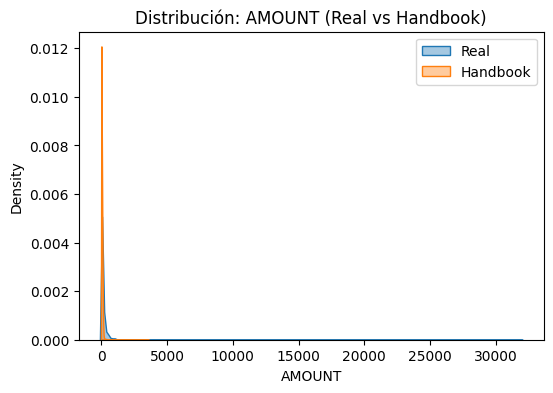

In [120]:
cols_to_compare = ['AMOUNT']
compare_distributions(df_real_clean, df_sparkov_clean, cols_to_compare, sim_name="Sparkov")
compare_distributions(df_real_clean, df_ADVO_clean, cols_to_compare, sim_name="ADVO")
compare_distributions(df_real_clean, df_Handbook_clean, cols_to_compare, sim_name="Handbook")

### ENTRENAMIENTO DE MODELOS PARA COMPARAR EL COMPORTAMIENTO DE MODELOS ENTRENADOS CON DATOS REALES CON INFORMACION DE SUMILADORES

scale_pos_weight = 13.98

Entrenando CatBoost con datos reales...
CatBoost → Real: AUC = 0.8211
Entrenando LightGBM con datos reales...
CatBoost → Real: AUC = 0.8211
Entrenando LightGBM con datos reales...
LightGBM → Real: AUC = 0.8219
Entrenando XGBoost con datos reales...
LightGBM → Real: AUC = 0.8219
Entrenando XGBoost con datos reales...
XGBoost → Real: AUC = 0.8448

📊 Evaluando modelos entrenados en real sobre datasets simulados:

CatBoost → Sparkov: AUC = 0.4455
CatBoost → ADVO: AUC = 0.3644
CatBoost → Handbook: AUC = 0.5384
XGBoost → Real: AUC = 0.8448

📊 Evaluando modelos entrenados en real sobre datasets simulados:

CatBoost → Sparkov: AUC = 0.4455
CatBoost → ADVO: AUC = 0.3644
CatBoost → Handbook: AUC = 0.5384
LightGBM → Sparkov: AUC = 0.6880
LightGBM → Sparkov: AUC = 0.6880
LightGBM → ADVO: AUC = 0.3840
LightGBM → ADVO: AUC = 0.3840
LightGBM → Handbook: AUC = 0.5845
LightGBM → Handbook: AUC = 0.5845
XGBoost → Sparkov: AUC = 0.5577
XGBoost → Sparkov: AUC = 0.5577
XGBoost → AD

,Real,Sparkov,ADVO,Handbook
CatBoost,0.821114,0.445451,0.364410,0.538363
LightGBM,0.821896,0.688015,0.383953,0.584504
XGBoost,0.844787,0.557709,0.363630,0.570240


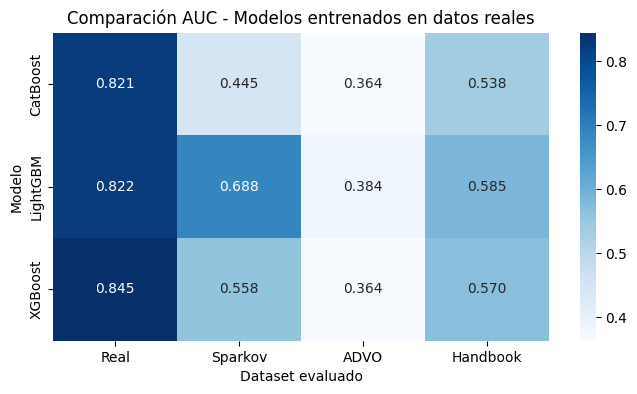

In [141]:
import warnings, sys, os, numpy as np, pandas as pd
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# === Silenciar completamente salidas internas ===
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')
    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# --- Dataset real ---
df_real_sorted = df_real_clean.sort_values(by=['MONTH', 'DAY', 'HOUR'])
X_real = df_real_sorted.drop(columns=['IS_FRAUD'])
y_real = df_real_sorted['IS_FRAUD']

# División clásica (sin validación temporal)
X_train, X_test, y_train, y_test = train_test_split(
    X_real, y_real, test_size=0.2, stratify=y_real, random_state=42
)

scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
print(f"scale_pos_weight = {scale_pos_weight:.2f}\n")

# --- Modelos ---
models = {
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=8,
        auto_class_weights='Balanced', verbose=0, random_seed=42),
    "LightGBM": LGBMClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=8,
        scale_pos_weight=scale_pos_weight, random_state=42, verbose=-1),
    "XGBoost": XGBClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=8,
        scale_pos_weight=scale_pos_weight, random_state=42,
        eval_metric='logloss', use_label_encoder=False, verbosity=0)
}

# --- Entrenamiento ---
results = {}
for name, model in models.items():
    print(f"Entrenando {name} con datos reales...")
    with HiddenPrints():
        model.fit(X_train, y_train)
    
    # Evaluar sobre el dataset real (base)
    y_pred_real = model.predict_proba(X_test)[:, 1]
    auc_real = roc_auc_score(y_test, y_pred_real)
    results[name] = {"Real": auc_real}
    print(f"{name} → Real: AUC = {auc_real:.4f}")

# --- Datasets simulados ---
datasets_sim = {
    "Sparkov": df_sparkov_clean,
    "ADVO": df_ADVO_clean,
    "Handbook": df_Handbook_clean
}

# --- Evaluación cruzada ---
print("\n📊 Evaluando modelos entrenados en real sobre datasets simulados:\n")

for name, model in models.items():
    for sim_name, df_sim in datasets_sim.items():
        X_sim = df_sim.drop(columns=['IS_FRAUD'])
        y_sim = df_sim['IS_FRAUD']
        try:
            with HiddenPrints():
                y_pred_sim = model.predict_proba(X_sim)[:, 1]
            auc_sim = roc_auc_score(y_sim, y_pred_sim)
            results[name][sim_name] = auc_sim
            print(f"{name} → {sim_name}: AUC = {auc_sim:.4f}")
        except Exception as e:
            print(f"{name} → {sim_name}: ❌ Error ({e})")
            results[name][sim_name] = np.nan

# --- Mostrar tabla resumen ---
results_df = pd.DataFrame(results).T
print("\n📈 Resultados finales (AUC entrenado en real → simuladores):")
display(results_df)

# --- Heatmap comparativo ---
plt.figure(figsize=(8, 4))
sns.heatmap(results_df, annot=True, fmt=".3f", cmap="Blues")
plt.title("Comparación AUC - Modelos entrenados en datos reales")
plt.ylabel("Modelo")
plt.xlabel("Dataset evaluado")
plt.show()


scale_pos_weight = 13.98

Entrenando CatBoost con datos reales...
CatBoost → Real: AUC = 0.8211
Entrenando LightGBM con datos reales...
CatBoost → Real: AUC = 0.8211
Entrenando LightGBM con datos reales...
LightGBM → Real: AUC = 0.8219
Entrenando XGBoost con datos reales...
LightGBM → Real: AUC = 0.8219
Entrenando XGBoost con datos reales...
XGBoost → Real: AUC = 0.8448
Entrenando RandomForest con datos reales...
XGBoost → Real: AUC = 0.8448
Entrenando RandomForest con datos reales...
RandomForest → Real: AUC = 0.7852
Entrenando LogisticRegression con datos reales...
RandomForest → Real: AUC = 0.7852
Entrenando LogisticRegression con datos reales...
LogisticRegression → Real: AUC = 0.6284

📊 Evaluando modelos entrenados en real sobre datasets simulados:

CatBoost → Sparkov: AUC = 0.4455
CatBoost → ADVO: AUC = 0.3644
CatBoost → Handbook: AUC = 0.5384
LogisticRegression → Real: AUC = 0.6284

📊 Evaluando modelos entrenados en real sobre datasets simulados:

CatBoost → Sparkov: AUC = 0.445

,Real,Sparkov,ADVO,Handbook
CatBoost,0.821114,0.445451,0.364410,0.538363
LightGBM,0.821896,0.688015,0.383953,0.584504
XGBoost,0.844787,0.557709,0.363630,0.570240
RandomForest,0.785194,0.303905,0.312927,0.523001
LogisticRegression,0.628435,0.460365,0.526138,0.499286


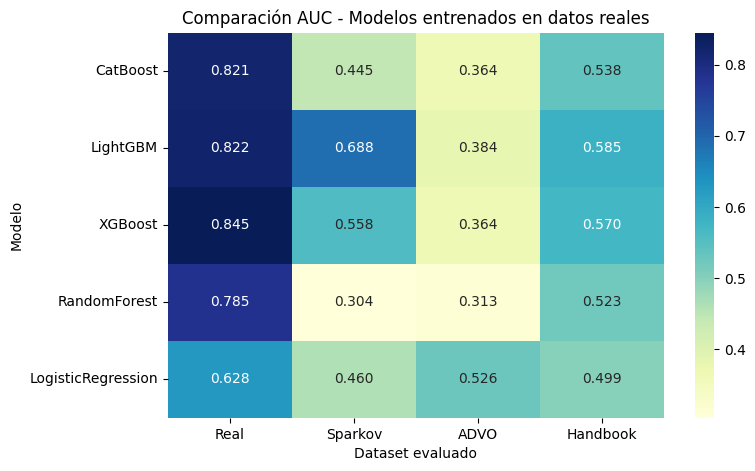

In [ ]:
import warnings, sys, os, numpy as np, pandas as pd
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# === Clase para silenciar prints internos ===
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')
    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# --- Dataset real ---
df_real_sorted = df_real_clean.sort_values(by=['MONTH', 'DAY', 'HOUR'])
X_real = df_real_sorted.drop(columns=['IS_FRAUD'])
y_real = df_real_sorted['IS_FRAUD']


X_train, X_test, y_train, y_test = train_test_split(
    X_real, y_real, test_size=0.2, stratify=y_real, random_state=42
)

scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
print(f"scale_pos_weight = {scale_pos_weight:.2f}\n")

# --- Modelos ---
models = {
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=8,
        auto_class_weights='Balanced', verbose=0, random_seed=42),
    "LightGBM": LGBMClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=8,
        scale_pos_weight=scale_pos_weight, random_state=42, verbose=-1),
    "XGBoost": XGBClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=8,
        scale_pos_weight=scale_pos_weight, random_state=42,
        eval_metric='logloss', use_label_encoder=False, verbosity=0),
    "RandomForest": RandomForestClassifier(
        n_estimators=300, max_depth=10, class_weight='balanced_subsample', random_state=42, n_jobs=-1),
    "LogisticRegression": LogisticRegression(
        max_iter=1000, class_weight='balanced', solver='lbfgs', random_state=42)
}

# --- Entrenamiento y evaluación en dataset real ---
results = {}
for name, model in models.items():
    print(f"Entrenando {name} con datos reales...")
    with HiddenPrints():
        model.fit(X_train, y_train)
    
    y_pred_real = model.predict_proba(X_test)[:, 1]
    auc_real = roc_auc_score(y_test, y_pred_real)
    results[name] = {"Real": auc_real}
    print(f"{name} → Real: AUC = {auc_real:.4f}")

# --- Datasets simulados ---
datasets_sim = {
    "Sparkov": df_sparkov_clean,
    "ADVO": df_ADVO_clean,
    "Handbook": df_Handbook_clean
}

print("\n📊 Evaluando modelos entrenados en real sobre datasets simulados:\n")

# --- Evaluación cruzada ---
for name, model in models.items():
    for sim_name, df_sim in datasets_sim.items():
        X_sim = df_sim.drop(columns=['IS_FRAUD'])
        y_sim = df_sim['IS_FRAUD']
        try:
            with HiddenPrints():
                y_pred_sim = model.predict_proba(X_sim)[:, 1]
            auc_sim = roc_auc_score(y_sim, y_pred_sim)
            results[name][sim_name] = auc_sim
            print(f"{name} → {sim_name}: AUC = {auc_sim:.4f}")
        except Exception as e:
            print(f"{name} → {sim_name}: ❌ Error ({e})")
            results[name][sim_name] = np.nan

# --- Mostrar resultados finales ---
results_df = pd.DataFrame(results).T
print("\n📈 Resultados finales (AUC entrenado en real → simuladores):")
display(results_df)

# --- Heatmap comparativo ---
plt.figure(figsize=(8, 5))
sns.heatmap(results_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Comparación AUC - Modelos entrenados en datos reales")
plt.ylabel("Modelo")
plt.xlabel("Dataset evaluado")
plt.show()


In [144]:
from scipy.stats import ks_2samp, wasserstein_distance
from scipy.spatial.distance import jensenshannon
import numpy as np
import pandas as pd

# Variables numéricas que compararemos
numeric_cols = ['AMOUNT', 'HOUR', 'DAY', 'user_mean_amount', 'user_std_amount']

datasets = {
    "Real": df_real_clean,
    "Sparkov": df_sparkov_clean,
    "ADVO": df_ADVO_clean,
    "Handbook": df_Handbook_clean
}

# Calcular métricas de similitud
results = []
for sim_name, sim_df in datasets.items():
    if sim_name == "Real": 
        continue  # omitimos comparación consigo mismo
    
    row = {"Dataset": sim_name}
    for col in numeric_cols:
        real_data = df_real_clean[col].dropna()
        sim_data = sim_df[col].dropna()
        
        ks_stat = ks_2samp(real_data, sim_data).statistic
        wass = wasserstein_distance(real_data, sim_data)
        
        # Para JS, usamos histogramas normalizados
        p, _ = np.histogram(real_data, bins=50, range=(min(real_data.min(), sim_data.min()), max(real_data.max(), sim_data.max())), density=True)
        q, _ = np.histogram(sim_data, bins=50, range=(min(real_data.min(), sim_data.min()), max(real_data.max(), sim_data.max())), density=True)
        js = jensenshannon(p, q)
        
        row[f'{col}_KS'] = ks_stat
        row[f'{col}_Wass'] = wass
        row[f'{col}_JS'] = js
    results.append(row)

similarity_df = pd.DataFrame(results)
print("\n📊 Comparación estadística entre datasets (vs. Real):")
display(similarity_df.round(4))


📊 Comparación estadística entre datasets (vs. Real):


,Dataset,AMOUNT_KS,AMOUNT_Wass,AMOUNT_JS,HOUR_KS,HOUR_Wass,HOUR_JS,DAY_KS,DAY_Wass,DAY_JS,user_mean_amount_KS,user_mean_amount_Wass,user_mean_amount_JS,user_std_amount_KS,user_std_amount_Wass,user_std_amount_JS
0,Sparkov,0.3498,111.6365,0.0768,0.1699,1.7565,0.2161,0.0263,0.4847,0.0521,0.5509,119.4256,0.4267,0.4634,90.9151,0.1410
1,ADVO,0.4114,137.5341,0.1347,0.3438,3.7758,0.3852,0.0330,0.5359,0.0412,0.6795,137.5361,0.5054,0.5573,132.1637,0.3444
2,Handbook,0.3927,132.3716,0.1252,0.3443,3.9818,0.4101,0.0313,0.5327,0.0407,0.5868,132.3749,0.4564,0.3944,116.6684,0.3240


In [147]:
import pandas as pd

# --- 1️⃣ Preparar tabla de rendimiento (AUCs de los modelos) ---
# results_df tiene forma: Modelo | Real | Sparkov | ADVO | Handbook
# Convertimos a formato largo para poder agrupar por dataset
results_long = results_df.melt(
    id_vars='Dataset',  # columna que contiene los nombres de los modelos
    var_name='Simulated_Dataset', 
    value_name='AUC'
)

# --- 2️⃣ Calcular AUC promedio por dataset ---
auc_summary = (
    results_long.groupby('Simulated_Dataset')['AUC']
    .mean()
    .reset_index()
    .rename(columns={'Simulated_Dataset': 'Dataset', 'AUC': 'AUC_mean'})
)

# --- 3️⃣ Calcular similitud promedio (KS y JS) ---
similarity_summary = similarity_df.copy()
similarity_summary['KS_mean'] = similarity_summary[
    [c for c in similarity_summary.columns if '_KS' in c]
].mean(axis=1)
similarity_summary['JS_mean'] = similarity_summary[
    [c for c in similarity_summary.columns if '_JS' in c]
].mean(axis=1)
similarity_summary = similarity_summary[['Dataset', 'KS_mean', 'JS_mean']]

# --- 4️⃣ Combinar ambas tablas ---
final_comparison = pd.merge(
    auc_summary,
    similarity_summary,
    on='Dataset',
    how='left'
)

# --- 5️⃣ Mostrar tabla final ---
print("\n📋 Resumen comparativo general entre datasets reales y simulados:")
display(final_comparison.round(4))




📋 Resumen comparativo general entre datasets reales y simulados:


,Dataset,AUC_mean,KS_mean,JS_mean
0,ADVO,0.3902,0.4050,0.2822
1,Handbook,0.5431,0.3499,0.2713
2,Real,0.7803,NaN,NaN
3,Sparkov,0.4911,0.3121,0.1825


<Figure size 800x500 with 0 Axes>

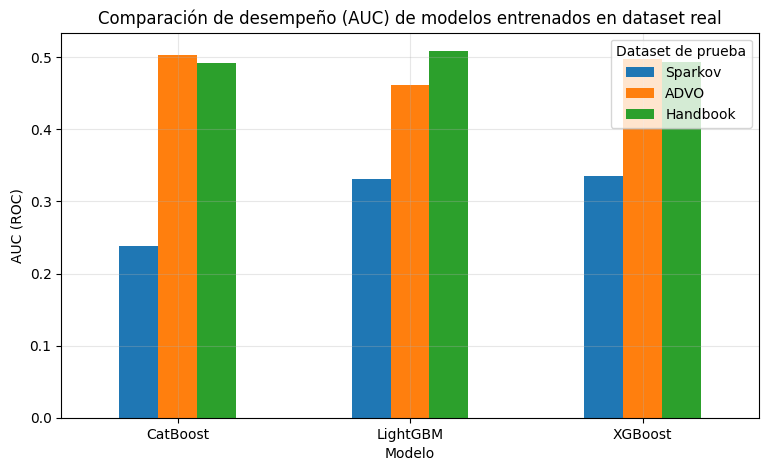

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
results_df.plot(kind='bar', figsize=(9,5))
plt.title("Comparación de desempeño (AUC) de modelos entrenados en dataset real")
plt.ylabel("AUC (ROC)")
plt.xlabel("Modelo")
plt.xticks(rotation=0)
plt.legend(title="Dataset de prueba")
plt.grid(alpha=0.3)
plt.show()
